<center>
<H1>Redes Complexas

In [33]:
# Bibliotecas
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from collections import Counter
import sympy
from scipy.special import gamma

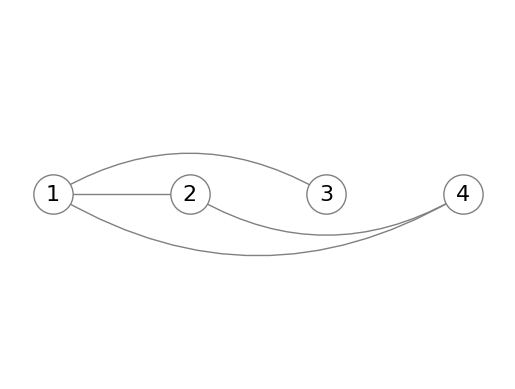

In [34]:
# Cria o grafo
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 4)])

pos = { 1: (0, 0), 2: (1, 0), 3: (2, 0), 4: (3, 0) }

# Nós (N)
nx.draw_networkx_nodes(G, pos, node_color = "white", edgecolors = "gray", node_size = 800)
nx.draw_networkx_labels(G, pos, font_size=16)

# Aresta (M)

nx.draw_networkx_edges(G, pos, edgelist = [(1, 2)], edge_color = "gray")

# Arestas curvas
nx.draw_networkx_edges(
    G, pos, edgelist = [(1, 3)],
    connectionstyle = "arc3,rad=-0.3",  # curva para cima
    edge_color = "gray",
    arrows = True
)
nx.draw_networkx_edges(
    G, pos, edgelist = [(1, 4), (2, 4)],
    connectionstyle = "arc3,rad=0.3",  # curva para baixo
    edge_color = "gray",
    arrows = True
)

plt.ylim(-0.5, 0.5)
plt.axis("off")
plt.show()


In [35]:
'''
G = nx.Graph()
G.add_nodes_from([x+1 for x in range(10)])
G.add_edges_from([
    (1, 2), (1, 3), (1, 4),
    (2, 3), (2, 4), (2, 5),
    (3, 4), (3, 7), (3, 8),
    (4, 5), (4, 6), (4, 7),
    (5, 6), (5, 7),
    (6, 7),
    (7, 8), (8, 9), (9, 10)
])
pos = { 
    1:( 0.0,  1.2),
    2:(-1.0,  0.5),
    3:( 1.0,  0.5),

    4:( 0.0,  0.0),

    5:(-1.0, -0.5),
    6:( 0.0, -1.2),
    7:( 1.0, -0.5),

    8:( 2.0,  0.0),
    9:( 3.0,  0.0),
    10:( 4.0,  0.0),
}

nx.draw_networkx_nodes(G, pos, node_color = "white", edgecolors = "gray", node_size = 800)
nx.draw_networkx_labels(G, pos, font_size = 16,)
nx.draw_networkx_edges(G, pos, edge_color = "gray")

plt.ylim(-2, 2)
plt.axis("off")
plt.show()
'''


'\nG = nx.Graph()\nG.add_nodes_from([x+1 for x in range(10)])\nG.add_edges_from([\n    (1, 2), (1, 3), (1, 4),\n    (2, 3), (2, 4), (2, 5),\n    (3, 4), (3, 7), (3, 8),\n    (4, 5), (4, 6), (4, 7),\n    (5, 6), (5, 7),\n    (6, 7),\n    (7, 8), (8, 9), (9, 10)\n])\npos = { \n    1:( 0.0,  1.2),\n    2:(-1.0,  0.5),\n    3:( 1.0,  0.5),\n\n    4:( 0.0,  0.0),\n\n    5:(-1.0, -0.5),\n    6:( 0.0, -1.2),\n    7:( 1.0, -0.5),\n\n    8:( 2.0,  0.0),\n    9:( 3.0,  0.0),\n    10:( 4.0,  0.0),\n}\n\nnx.draw_networkx_nodes(G, pos, node_color = "white", edgecolors = "gray", node_size = 800)\nnx.draw_networkx_labels(G, pos, font_size = 16,)\nnx.draw_networkx_edges(G, pos, edge_color = "gray")\n\nplt.ylim(-2, 2)\nplt.axis("off")\nplt.show()\n'

# Número máximos de arestas

$M_{\text{max}}=\binom{N}{2}=\frac{N(N-1)}{2}$

In [36]:
N = len(G.nodes)
M = len(G.edges)
M_max = N*(N-1)/2

# Matriz de adjacência $\overset{\leftrightarrow}{X}$ e Matriz de distâncias $\overset{\leftrightarrow}{L}$

$
\overset{\leftrightarrow}{X} = 
\begin{bmatrix}
    0 & 1 & 1 & 1 \\
    1 & 0 & 0 & 1 \\
    1 & 0 & 0 & 0 \\
    1 & 1 & 0 & 0
\end{bmatrix}
\quad\quad\quad % Espaço horizontal
\overset{\leftrightarrow}{L} = 
\begin{bmatrix}
    0 & 1 & 1 & 1 \\
    1 & 0 & 2 & 1 \\
    1 & 2 & 0 & 2 \\
    1 & 1 & 2 & 0
\end{bmatrix}
$

In [37]:

L_dst = np.array([
    [0, 1, 1, 1, 2, 2, 2, 2, 3, 4],
    [1, 0, 1, 1, 1, 2, 2, 3, 4, 5],
    [1, 1, 0, 1, 2, 2, 1, 1, 2, 3],
    [1, 1, 1, 0, 1, 1, 1, 2, 3, 4],
    [2, 1, 2, 1, 0, 1, 1, 2, 3, 4],
    [2, 2, 2, 1, 1, 0, 1, 2, 3, 4],
    [2, 2, 1, 1, 1, 1, 0, 1, 2, 3],
    [2, 3, 1, 2, 2, 2, 1, 0, 1, 2],
    [3, 4, 2, 3, 3, 3, 2, 1, 0, 1],
    [4, 5, 3, 4, 4, 4, 3, 2, 1, 0]
])

L_dst = np.array([
    [0, 1, 1, 1],
    [1, 0, 2, 1],
    [1, 2, 0, 2],
    [1, 1, 2, 0]
])

def generate_adj_matrix(graph) -> np.ndarray:
    ''' Cria uma matrix de adjacência '''
    
    N = len(graph.nodes)
    arr = np.eye(N) - np.eye(N) # Tabela de zeros
    
    for node in graph.nodes:
        for edge in graph.edges:
            if node in edge:
                arr[edge[0]-1][edge[1]-1] = 1
                arr[edge[1]-1][edge[0]-1] = 1
    
    return arr

X_adj = generate_adj_matrix(G)

# Densidade

$D=\frac{2M}{N(N-1)}$

In [38]:
density = (2*M)/(N*(N-1))

if density > 0.9:
    print(f"O grafo é denso. {density:.2f} ≃ 1")
elif density < 0.2:
    print(f"O grafo é esparso. 0 < {density:.2f} ≪ 1")
else:
    print(f"O grafo tem uma densidade de {density:.2f}")

O grafo tem uma densidade de 0.67


# Distância média do caminho mais curtos

$\langle l \rangle = (\frac{2}{N(N-1)}) \sum\limits_{i=1}^{N-1} \sum\limits_{j=i+1}^{N} l_{ij} \quad$
ou
$\quad \langle l \rangle = (\frac{1}{N(N-1)}) \sum\limits_{i=1}^{N} \sum\limits_{j=1}^{N} l_{ij}$

In [39]:
def mean_distance(N:int, L:np.ndarray) -> float:
    ''' Informa o comprimento médio do caminho mais curto <l>
    
        Args:
            N Número de nós do grafo.
            L Matriz de distâncias L.

        Returns:
            O comprimento médio do caminho mais curto.
    '''

    sum = 0
    for i in range(N):
        for j in range(i+1, N):
            sum += L[i][j]

    return float( (2/(N*(N-1))) * sum )

sympy.Rational(mean_distance(N, L_dst)).limit_denominator()

4/3

# Grau de conectividade do nó $i$

$k_i = \sum\limits_{j=1}^{N}x_{ij} = \sum\limits_{j=1}^{N}x_{ji}$

$\sum\limits_{i=1}^{N}k_i = 2M$

In [40]:
def get_ki(X:np.ndarray, i:int) -> int:
    ''' Informa o grau de conectividade do nó ```i```
    
        Args:
            X Matriz de adjacência.
            i Número do nó.

        Returns:
            O grau de conectividade k_i.
    '''
    try:    return int( np.sum(X[i - 1]) )
    except: return 0

sympy.Rational(get_ki(X_adj, 1))

3

# Distribuição de graus $P(k)$

$\langle k \rangle = \sum\limits_{k=k_{\text{min}}}^{k=k_{\text{max}}} kP(k)$

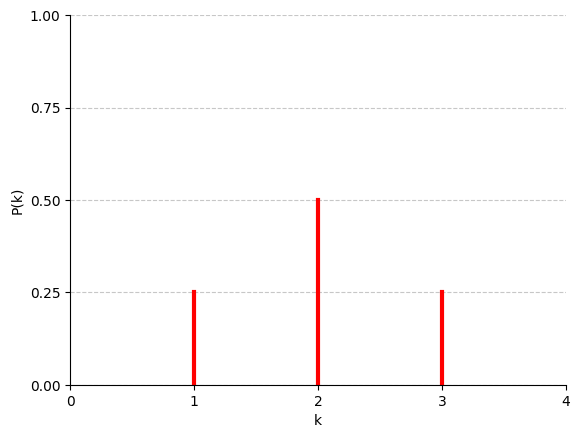

In [41]:
k_list = [get_ki(X_adj, i+1) for i in range( len(X_adj)) ]
occurrences = Counter(k_list)
pk_list = [p / len(k_list) for p in occurrences.values()]

# Plot
fig, ax = plt.subplots()
for oc, pk in zip( occurrences.keys(), pk_list ):
    ax.axvline(x = oc, ymax = pk, color = "red", linewidth = 3)


# Estilos
ax.set_xlabel('k')
ax.set_ylabel('P(k)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis = "y", linestyle = "--", alpha = 0.7)
ax.set_xlim(0, max(k_list)+1)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.25))

plt.show()

$\langle k \rangle = \frac{1}{N}\sum\limits_{i=1}^{N} k_i = \frac{2M}{N}$

# Entropia de distibuição

$ H = - \sum\limits_{k=k_{\text{min}}}^{k_{\text{max}}} P(k) \log_2(P(k))$

In [42]:
def calc_entropy(pk_list:list) -> float:
    ''' Informa a entropia do sistema através dos graus de conectividade
    
        Args:
            pk_list Lista com os valores de P(k).
        
        Returns
            A entropia do sistema.
    '''

    sum = 0
    for pk in pk_list:
        sum += pk * np.log2(pk)

    return float( -sum )

sympy.Rational(calc_entropy(pk_list)).limit_denominator()

3/2

# Coeficiente de agregação

$C_i \equiv \frac{b_i}{\binom{k_i}{2}} = \frac{2b_i}{k_i(k_i-1)}$

Em que, $b_i=\frac{1}{2}\sum\limits_{j=1}^{N}\sum\limits_{l=1}^{N} (x_{ij} \times x_{jl} \times x_{li})$

In [43]:
def aggregation_degree(i:int, X:np.ndarray) -> float:
    ''' Informa o grau de agregação do nó i
    
        Args:
            i   Número do nó.
            X   Matriz de adjacência.
        
        Returns:
            O grau de agregação do nó i.
    '''

    ki = get_ki(X, i)
    if ki < 2: return 0.0

    bi = 0
    for j in range(len(X)):
        for l in range(len(X)):
            bi += X[i-1][j] * X[j][l] * X[l][i-1]
    bi *= 0.5

    return float( (2*bi) / (ki*(ki-1)) )

# sympy.Rational(aggregation_degree(2, X_adj)).limit_denominator()

$\langle C \rangle = \frac{1}{N} \sum\limits_{i=1}^{N}C_i$

In [44]:
def mean_aggregation_degree(X:np.ndarray) -> float:
    ''' '''
    sum = 0
    N = len(X)
    for i in range(N):
        sum += aggregation_degree(i+1, X)

    return float( sum / N )

sympy.Rational(mean_aggregation_degree(X_adj)).limit_denominator()

7/12

# Grau de assortatividade

$k_{v,i} \equiv \frac{1}{k_i} \sum\limits_{j=1}^{N}x_{ij}k_j$

In [45]:
def assortativity_degree(X:np.ndarray, i:int) -> float:
    ''' Informa o grau de assortividade de um nó
    
    Args:
            X Matriz de adjacência.
            i Número do nó.

        Returns:
            O grau de assortividade k_i.
    
    '''

    ki = get_ki(X, i)
    N = len(X[0])

    sum = 0
    for j in range(N):
        sum += X[i-1][j]*get_ki(X, j+1)

    return (1/ki)*sum

print("k_v,1 = ")
sympy.Rational(assortativity_degree(X_adj, 1)).limit_denominator()


k_v,1 = 


5/3

# Coeficiente de assortatividade de uma rede

$r \equiv \frac{\frac{1}{M}\sum_{i=1}^{M}j_il_i-(\frac{1}{2M}\sum_{i=1}^{M}(j_i+l_i))^2}{\frac{1}{2M}\sum_{i=1}^{M}(j_i^2+l_i^2)-(\frac{1}{2M}\sum_{i=1}^{M}(j_i+l_i))^2}$

<center> <h1> Análise de distribuição em uma rede complexa </h1> </center>

$P(k) = \frac{\langle k \rangle}{k!}e^{(-\langle k \rangle)}$

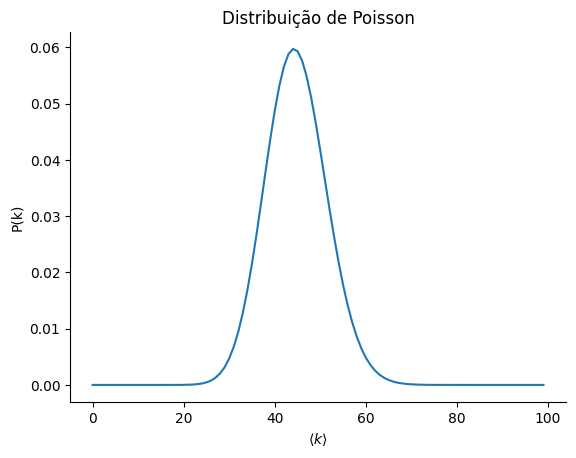

In [46]:
N = 150
p = .3
k_avg = p*(N-1)

def Pk(k):
    return ((k_avg**k)/gamma(k + 1)) * np.e**(-k_avg)

k_range = 100
pk_list = [Pk(k) for k in range(k_range)]

# Cria o gráfico
fig, ax = plt.subplots()
ax.plot(range(k_range), pk_list)

# Adiciona rótulos e título
ax.set_xlabel(r"$\langle k \rangle$")
ax.set_ylabel("P(k)")
ax.set_title("Distribuição de Poisson")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

$\langle l \rangle = \frac{\log N}{\log \langle k \rangle}$

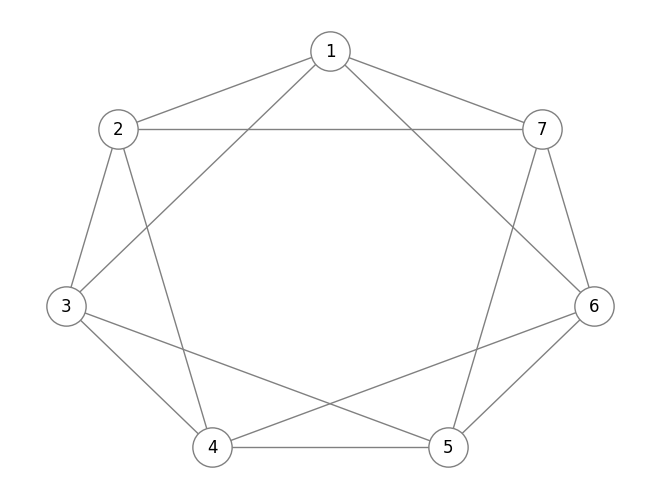

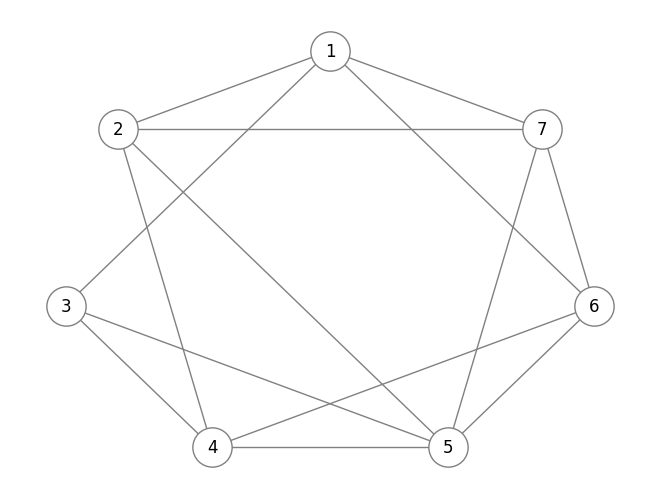

In [ ]:
M = 7
m = 2

mpG = nx.Graph() # Grafo de mundo pequeno
mpG.add_nodes_from([node+1 for node in range(M)])
mpG.add_edges_from([
    (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,1),
    (1,3), (1,6), (2,4), (2,7), (3,5), (4,6), (5,7)
])

# Layout circular
pos = {}
for i in range(M):
    angle = (2 * np.pi * i / M) + np.pi/2  # Divide o círculo igualmente
    x = np.cos(angle)
    y = np.sin(angle)
    pos[i+1] = (x, y)  # Nós numerados de 1 a M

# Desenhar grafo
nx.draw(mpG, pos, with_labels = True, node_color = "white", edge_color = "gray", node_size = 800, edgecolors = "gray")
plt.show()

#============================

from random import random
p = 0.1
itt = 1

for _ in range(itt):
    edges_to_check = list(mpG.edges)  # Faz uma cópia segura das arestas

    for edge in edges_to_check:
        i, j = edge

        for node in (i, j):
            if random() > p:
                continue

            # Remove a aresta original
            if mpG.has_edge(i, j):
                mpG.remove_edge(i, j)

            # Tenta conectar node a um novo nó
            for n in range(1, len(mpG.nodes) + 1):

                if n in (i, j) or mpG.has_edge(node, n):
                    continue

                mpG.add_edge(node, n)
                break


# Layout circular
pos = {}
for i in range(M):
    angle = (2 * np.pi * i / M) + np.pi/2  # Divide o círculo igualmente
    x = np.cos(angle)
    y = np.sin(angle)
    pos[i+1] = (x, y)  # Nós numerados de 1 a M

# Desenhar grafo
nx.draw(mpG, pos, with_labels = True, node_color = "white", edge_color = "gray", node_size = 800, edgecolors = "gray")
plt.show()